# CNN 기반 Classification

## [예제5] MNIST Handwrite - Classifier by CNN : 단일 Convolution Layer

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Load MNIST Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.astype(np.double)
train_data = np.expand_dims(train_data, axis=-1)
train_data = train_data / 255.0

test_data = test_data.astype(np.double)
test_data = np.expand_dims(test_data, axis=-1)
test_data = test_data / 255.0

11493376/11490434 [==============================] - 1s 0us/step


>### Create Model


In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='sigmoid',input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Compile Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss='categorical_crossentropy',
              metrics=['accuracy'])

>### 결과 출력을 위한 함수

In [5]:
def Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        #if label[idx] == y_max[idx] : pass
        ax_result[idx//5][idx%5].imshow(data[idx].reshape((28,28)),cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### 학습 전 상황

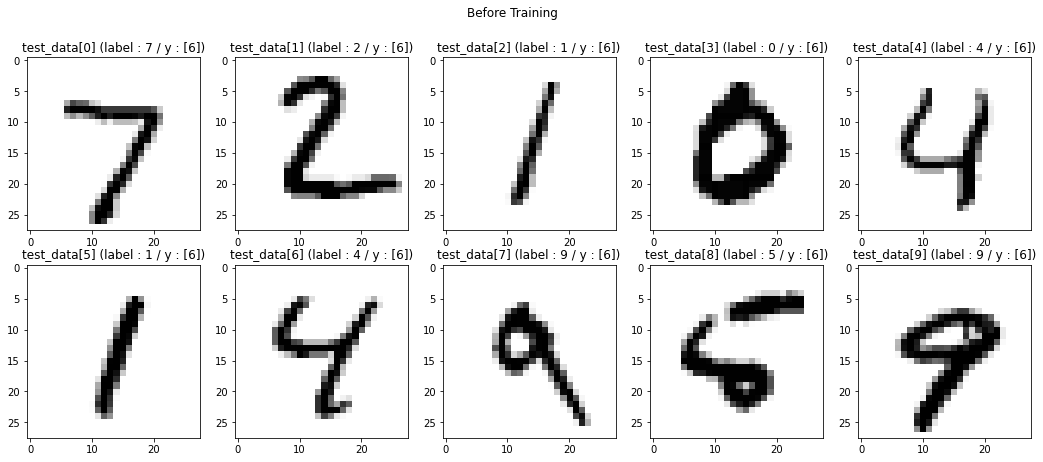

In [6]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("Before Training", test_data, test_labels, y_max)

> ### 학습 (Training)

In [7]:
%%time
history = model.fit(train_data, train_labels, shuffle=True,
                 batch_size=100, epochs=10,
                 validation_data=(test_data, test_labels)
                 )

Epoch 1/10
600/600 [==============================] - 23s 38ms/step - loss: 1.0759 - accuracy: 0.6734 - val_loss: 0.4538 - val_accuracy: 0.8698
Epoch 2/10
600/600 [==============================] - 22s 37ms/step - loss: 0.3849 - accuracy: 0.8835 - val_loss: 0.4021 - val_accuracy: 0.8697
Epoch 3/10
600/600 [==============================] - 22s 37ms/step - loss: 0.3356 - accuracy: 0.8991 - val_loss: 0.3537 - val_accuracy: 0.8933
Epoch 4/10
600/600 [==============================] - 22s 37ms/step - loss: 0.3094 - accuracy: 0.9066 - val_loss: 0.2461 - val_accuracy: 0.9286
Epoch 5/10
600/600 [==============================] - 22s 37ms/step - loss: 0.2751 - accuracy: 0.9176 - val_loss: 0.2784 - val_accuracy: 0.9111
Epoch 6/10
600/600 [==============================] - 22s 37ms/step - loss: 0.2526 - accuracy: 0.9246 - val_loss: 0.2297 - val_accuracy: 0.9284
Epoch 7/10
600/600 [==============================] - 22s 37ms/step - loss: 0.2276 - accuracy: 0.9327 - val_loss: 0.2083 - val_accuracy:

> ### Ploting : Cost/Training Count

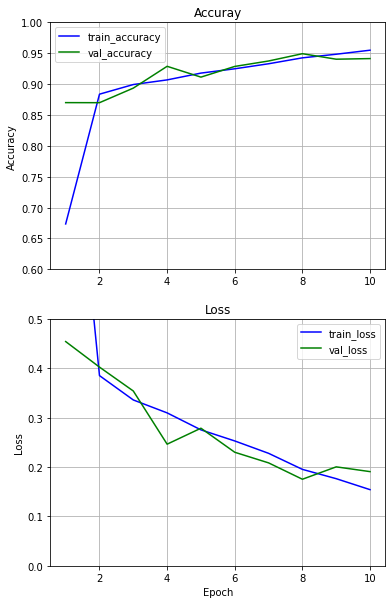

In [8]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.6,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,0.5])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### Training 이후

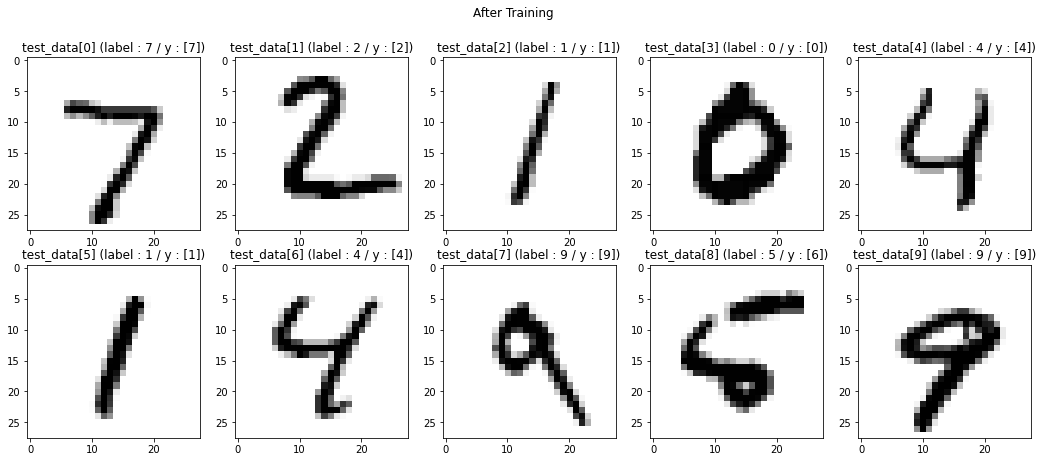

In [9]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)